In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
r_cols = ['user_id', 'player_id', 'count']
df = pd.read_csv('user_team.csv', sep=',', names=r_cols, encoding='latin-1')

In [4]:
df.head()

,user_id,player_id,count
0,20082019-YPX56QBJ-S3FCYU12-S3FCYU12,zgqjravo,1
1,20082019-YPX56QBJ-S3FCYU12-S3FCYU12,nngznqno,1
2,20082019-YPX56QBJ-S3FCYU12-S3FCYU12,dlkkbbwz,1
3,20082019-YPX56QBJ-S3FCYU12-S3FCYU12,bbzrkjpg,1
4,20082019-YPX56QBJ-S3FCYU12-S3FCYU12,bbnpmqam,1


In [5]:
count = df.groupby(['player_id']).count()
count.sort_values(by = ['count'], ascending = False)

,user_id,count
player_id,,
oqjzrbnv,38,38
bbzrkjpg,31,31
azbaqqml,28,28
azormlbb,26,26
vwddkdzo,24,24
...,...,...
nrjmnlaj,1,1
nrjpovzn,1,1
nrqzaggb,1,1


In [6]:
# r_cols = ['user_id', 'player_id', 'rating']
names_list = pd.read_csv('player_name.csv', sep=',')
names_list

,ID,name,season
0,adamlkmog,Adrien Rabiot,Paris Saint-Germain
1,adamlmkvr,Sébastien Cibois,Paris Saint-Germain
2,alkkaadr,Giuliano,LIVE
3,alkkabav,Christer Gustafsson,LIVE
4,alkkabgm,Giacomo Bonaventura,LIVE
...,...,...,...
23033,zzolkovp,Juan Sebastián Verón,ICON
23034,zzolzrvq,David Seaman,ICON
23035,zzolzvll,Gianfranco Zola,ICON
23036,zzozbzjr,Paulo Futre,ICON


In [11]:
recommendation = pd.merge(count, names_list, left_on = 'player_id', right_on='ID', how = 'left')
recommendation = recommendation[['ID', 'name', 'season', 'count']].sort_values(by = ['count'], ascending = False)
recommendation['name'] = recommendation['name'] + ' - ' + recommendation['season']
recommendation = recommendation[['name', 'count']]
recommendation = recommendation.set_index('name')
recommendation.head(10)

,count
name,
Ruud Gullit - Top Transfer,38
Patrick Vieira - Top Transfer,31
Ronaldo - Heroes Of the Team,28
Ronaldo - Top Transfer,26
Gianluigi Donnarumma - LIVE,24
Cristiano Ronaldo - Heroes Of the Team,22
Theo Hernández - LIVE,22
Cristiano Ronaldo - Top Transfer,20
Patrick Vieira - Nation Hero Debut,19


array([[<AxesSubplot:title={'center':'count'}>]], dtype=object)

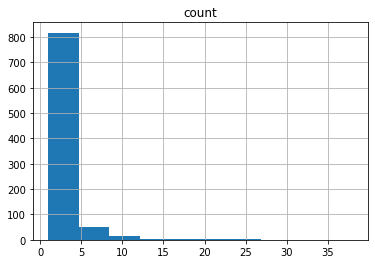

In [8]:
recommendation.hist(legend = None)

<AxesSubplot:ylabel='count'>

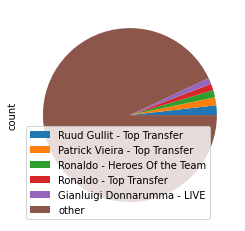

In [9]:
top = 5
temp2 = recommendation.head(top)
if len(recommendation) > top:
    sum = np.sum(recommendation[top:].values)
    df_temp = pd.DataFrame({'count': [sum]}, index = ['other'])
    temp2 = temp2.append(df_temp)
# temp2
temp2.plot.pie(y='count', labels=None)

# recommendation.head(10).plot.pie(y='rating', figsize=(5, 5))